#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Load Raw Data

In [2]:
df = pd.read_csv(r"C:/Users/97252/Desktop/Chen_proj/data/data.csv")
df.head()

C:\Users\97252\AppData\Local\Temp\ipykernel_1124\1868723526.py:1: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:/Users/97252/Desktop/Chen_proj/data/data.csv")


,ID,Crash ID,crash_fatal_fl,case_id,Primary address,Secondary address,rpt_block_num,rpt_street_name,rpt_street_sfx,crash_speed_limit,...,Crash timestamp (US/Central),Crash timestamp,Is deleted,Is temporary record,Law enforcement fatality count,Reported street prefix,Estimated Maximum Comprehensive Cost,Estimated Total Comprehensive Cost,Location ID,Location group
0,848,13653671.0,False,140050130,1200 LAVACA,12TH ST,1200,LAVACA,NaN,35.0,...,01/05/2014 01:16:00 AM,01/05/2014 07:16:00 AM,False,False,0,NaN,20000,40000,C842E0B8AD,1.0
1,1148,13663307.0,False,140151612,6200 NOT REPORTED HWY,6300 JOE TANNER LN,6200,NOT REPORTED,HWY,45.0,...,01/15/2014 08:23:00 PM,01/16/2014 02:23:00 AM,False,False,0,NaN,20000,40000,NaN,NaN
2,1417,13668262.0,False,140141596,ANTHONY ST,HOLLY ST,NaN,ANTHONY,ST,30.0,...,01/14/2014 07:25:00 PM,01/15/2014 01:25:00 AM,False,False,0,NaN,20000,40000,NaN,NaN
3,1479,13668444.0,False,140181283,4420 NOT REPORTED RD,FINCHER RD RD,4420,NOT REPORTED,RD,-1.0,...,01/18/2014 05:29:00 PM,01/18/2014 11:29:00 PM,False,False,0,NaN,250000,330000,NaN,NaN
4,1670,13671393.0,False,140201033,10010 NOT REPORTED RD,MC NEIL DR,10010,NOT REPORTED,RD,55.0,...,01/20/2014 03:36:00 PM,01/20/2014 09:36:00 PM,False,False,0,NaN,20000,40000,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224689 entries, 0 to 224688
Data columns (total 47 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    224689 non-null  int64  
 1   Crash ID                              224687 non-null  float64
 2   crash_fatal_fl                        224689 non-null  bool   
 3   case_id                               221754 non-null  object 
 4   Primary address                       224689 non-null  object 
 5   Secondary address                     224687 non-null  object 
 6   rpt_block_num                         194450 non-null  object 
 7   rpt_street_name                       224688 non-null  object 
 8   rpt_street_sfx                        153800 non-null  object 
 9   crash_speed_limit                     224688 non-null  float64
 10  road_constr_zone_fl                   224687 non-null  object 
 11  

In [4]:
df.shape

(224689, 47)

#### Drop irrelevant columns

##### We removed several columns that do not contribute to the predictive model:
###### - Unique identifier fields
###### - Crash timestamp (UTC) because local timestamp exists
###### - Internal system flags (Is Deleted, Is Temporary Record)

In [3]:
df = df.drop(columns=['ID', 'Crash ID', 'case_id','Crash timestamp', 'Is deleted', 'Is temporary record'])


#### Duplicates

In [4]:
df = df.drop_duplicates()

#### Fix data types

In [6]:
df.dtypes

crash_fatal_fl                             bool
Primary address                          object
Secondary address                        object
rpt_block_num                            object
rpt_street_name                          object
rpt_street_sfx                           object
crash_speed_limit                       float64
road_constr_zone_fl                      object
latitude                                float64
longitude                               float64
crash_sev_id                              int64
sus_serious_injry_cnt                     int64
nonincap_injry_cnt                        int64
poss_injry_cnt                            int64
non_injry_cnt                             int64
unkn_injry_cnt                            int64
tot_injry_cnt                             int64
death_cnt                                 int64
units_involved                           object
point                                    object
motor_vehicle_death_count               

In [5]:
# BOOL
df['road_constr_zone_fl'] = df['road_constr_zone_fl'].astype(bool)

# INT
cols_int = [
    'rpt_block_num',
    'Location group'
]
df[cols_int] = df[cols_int].apply(pd.to_numeric, errors='coerce').astype('Int64')

# FLOAT
cols_float = [
    'Estimated Maximum Comprehensive Cost',
    'Estimated Total Comprehensive Cost'
]
df[cols_float] = df[cols_float].apply(pd.to_numeric, errors='coerce').astype(float)

# DATETIME
df['Crash timestamp (US/Central)'] = pd.to_datetime(
    df['Crash timestamp (US/Central)'],
    errors='coerce'
)

In [8]:
df.dtypes

crash_fatal_fl                                    bool
Primary address                                 object
Secondary address                               object
rpt_block_num                                    Int64
rpt_street_name                                 object
rpt_street_sfx                                  object
crash_speed_limit                              float64
road_constr_zone_fl                               bool
latitude                                       float64
longitude                                      float64
crash_sev_id                                     int64
sus_serious_injry_cnt                            int64
nonincap_injry_cnt                               int64
poss_injry_cnt                                   int64
non_injry_cnt                                    int64
unkn_injry_cnt                                   int64
tot_injry_cnt                                    int64
death_cnt                                        int64
units_invo

#### Handle outliers

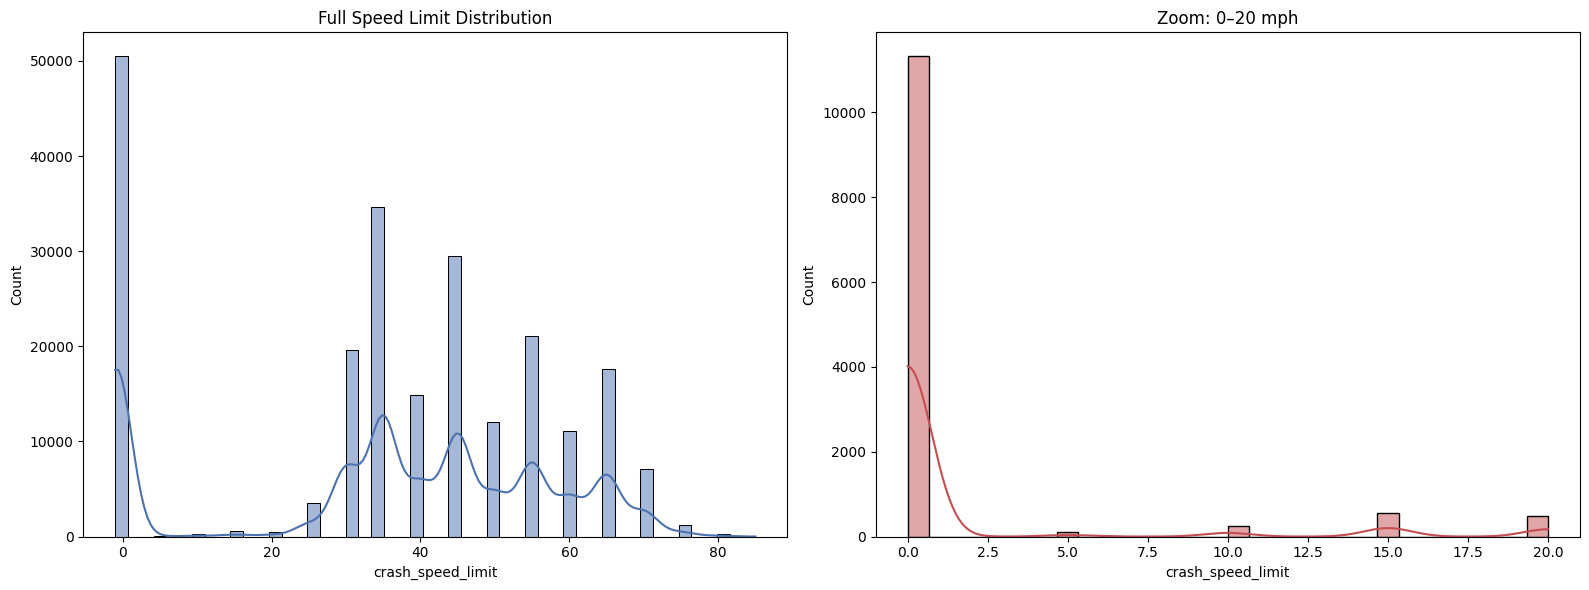

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(df["crash_speed_limit"], bins=50, kde=True, ax=axes[0], color="#4C72B0")
axes[0].set_title("Full Speed Limit Distribution")
subset = df[(df["crash_speed_limit"] >= 0) & (df["crash_speed_limit"] <= 20)]
sns.histplot(subset["crash_speed_limit"], bins=30, kde=True, ax=axes[1], color="#C44E52")
axes[1].set_title("Zoom: 0–20 mph")
plt.tight_layout()
plt.show()

Handling crash_speed_limit

A focused visualization of the 0–20 mph range showed that values below 10 mph (e.g., 0, 1, 2, 5) are unrealistic and represent missing or incorrect entries in the CRIS system.
We therefore set all values < 10 mph to NaN.

Missing values were then imputed using the median, since it is robust to outliers and best reflects the central tendency of real speed limits.

In [7]:
df.loc[df['crash_speed_limit'] < 10, 'crash_speed_limit'] = np.nan


#### Handle Missing data

In [ ]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing[missing > 0].to_frame("count").join(
    missing_percent[missing_percent > 0].to_frame("percent")
)

,count,percent
Secondary address,2,0.000890
rpt_block_num,30318,13.493317
rpt_street_name,1,0.000445
rpt_street_sfx,70889,31.549831
crash_speed_limit,50601,22.520462
latitude,3337,1.485164
longitude,3338,1.485609
point,3338,1.485609
Reported street prefix,224689,100.000000
Location ID,20668,9.198492


Missing Data Strategy

- More than 40 percent missing: drop the entire column.

- Less than 5 percent missing: drop the rows containing missing values.

- Between 5 percent and 40 percent missing: apply appropriate imputation based on feature type and  distribution.

In [12]:
# עמודות למחיקה (מעל 40 אחוז)
cols_drop = missing_percent[missing_percent > 40].index.tolist()

# עמודות שמוחקים עבורן שורות (פחות מ־5 אחוז)
cols_drop_rows = missing_percent[(missing_percent > 0) & (missing_percent < 5)].index.tolist()

# מחיקת עמודות
df = df.drop(columns=cols_drop)

# מחיקת שורות רק על העמודות הרלוונטיות
df = df.dropna(subset=cols_drop_rows)

print("Dropped columns:", cols_drop)
print("Dropped rows based on columns:", cols_drop_rows)


Dropped columns: ['Reported street prefix']
Dropped rows based on columns: ['Secondary address', 'rpt_street_name', 'latitude', 'longitude', 'point']


In [13]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing[missing > 0].to_frame("count").join(
    missing_percent[missing_percent > 0].to_frame("percent")
)


,count,percent
rpt_block_num,29000,13.101541
rpt_street_sfx,69428,31.365994
crash_speed_limit,49775,22.487215
Location ID,17330,7.829300
Location group,17330,7.829300


In [ ]:
#median_speed = df['crash_speed_limit'].median()
#df['crash_speed_limit'] = df['crash_speed_limit'].fillna(median_speed)
# לתת הסבר למה חציון
# לא לעשות חציון על הכל כי זה גורם לזליגת דאטה

# צריך להיות במחברת אחרי שאנחנו עושים TRAIN TEST
#צריך להיות במחברת של FEATURE ENGENRING